# **Exploratory Data Analysis**

---
---

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [20]:
clean_df = pd.read_csv('../data/processed/clean_pollutants.csv')
clean_df

FECHA      N_CCAA PROVINCIA      N_MUNICIPIO  ESTACION MAGNITUD  \
0       2022-01-04  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
1       2022-01-05  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
2       2022-01-06  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
3       2022-01-07  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
4       2022-01-08  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
...            ...         ...       ...              ...       ...      ...   
719277  2022-12-13       CEUTA     CEUTA            CEUTA         1      SO2   
719278  2022-12-16       CEUTA     CEUTA            CEUTA         1      SO2   
719279  2022-12-25       CEUTA     CEUTA            CEUTA         1      SO2   
719280  2022-12-26       CEUTA     CEUTA            CEUTA         1      SO2   
719281  2022-12-28       CEUTA     CEUTA            CEUTA         1      SO2   

        LATITUD  LONGITUD   H01   H02  ...    H15    H16    H17    H18    H19  \
0       42.8548   -2.6807  0.16  0.16  ...   0.17   0.18   0.19   0.25   0.25   
1       42.8548   -2.6807  0.23  0.26  ...   0.48   0.33   0.45   0.58   0.57   
2       42.8548   -2.6807  0.36  0.31  ...   0.30   0.26   0.29   0.36   0.43   
3       42.8548   -2.6807  0.25  0.24  ...   0.28   0.29   0.28   0.32   0.31   
4       42.8548   -2.6807  0.25  0.25  ...   0.25   0.20   0.23   0.25   0.25   
...         ...       ...   ...   ...  ...    ...    ...    ...    ...    ...   
719277  35.8930   -5.3147  1.53  1.33  ...   2.22   2.43   3.32   6.62  19.11   
719278  35.8930   -5.3147  1.64  1.50  ...  15.03  25.54  12.58  38.78  17.84   
719279  35.8930   -5.3147  2.30  2.15  ...   2.72   2.27   2.07   2.00   1.79   
719280  35.8930   -5.3147  1.40  1.22  ...   3.31   3.77   2.82   2.47   2.79   
719281  35.8930   -5.3147  1.68  1.40  ...   1.88   1.71   1.66   1.70   1.58   

          H20    H21    H22    H23    H24  
0        0.28   0.25   0.20   0.20   0.22  
1        0.51   0.51   0.51   0.48   0.41  
2        0.32   0.32   0.30   0.30   0.28  
3        0.23   0.25   0.29   0.29   0.28  
4        0.23   0.20   0.22   0.22   0.19  
...       ...    ...    ...    ...    ...  
719277  17.15   8.29  29.35  24.51  24.16  
719278   8.01  11.66   3.28   5.70   5.62  
719279   1.65   1.68   1.39   1.30   1.28  
719280   2.77   2.66   2.51   2.42   2.52  
719281   2.12   1.61   1.57   1.88   1.62  

[719282 rows x 32 columns]

In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719282 entries, 0 to 719281
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FECHA        719282 non-null  object 
 1   N_CCAA       718259 non-null  object 
 2   PROVINCIA    719282 non-null  object 
 3   N_MUNICIPIO  718259 non-null  object 
 4   ESTACION     719282 non-null  int64  
 5   MAGNITUD     719282 non-null  object 
 6   LATITUD      715747 non-null  float64
 7   LONGITUD     715747 non-null  float64
 8   H01          719282 non-null  float64
 9   H02          719282 non-null  float64
 10  H03          719282 non-null  float64
 11  H04          719282 non-null  float64
 12  H05          719282 non-null  float64
 13  H06          719282 non-null  float64
 14  H07          719282 non-null  float64
 15  H08          719282 non-null  float64
 16  H09          719282 non-null  float64
 17  H10          719282 non-null  float64
 18  H11          719282 non-

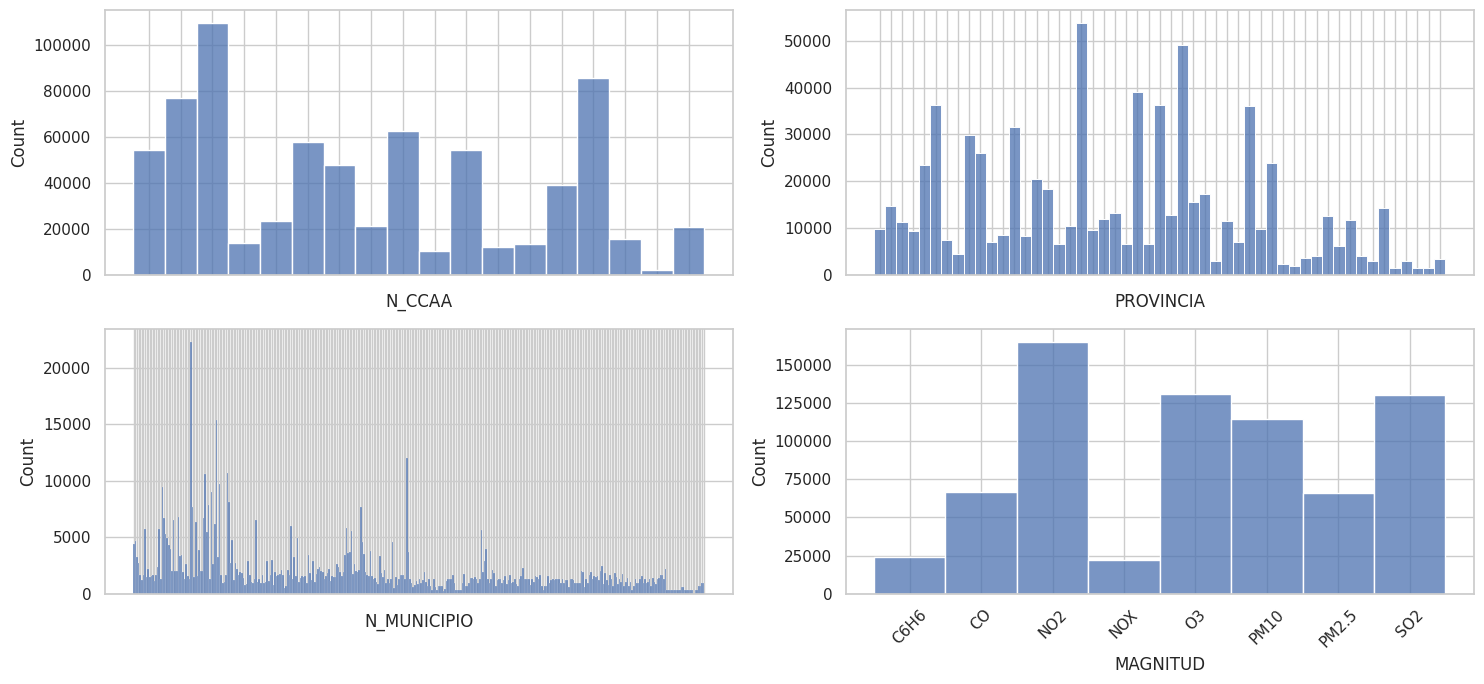

In [22]:

sns.set(style="whitegrid")

fig, axis = plt.subplots(2, 2, figsize=(15, 7))

# Histogramas
sns.histplot(ax=axis[0, 0], data=clean_df, x="N_CCAA").set_xticklabels([])
sns.histplot(ax=axis[0, 1], data=clean_df, x="PROVINCIA").set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=clean_df, x="N_MUNICIPIO").set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=clean_df, x="MAGNITUD")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


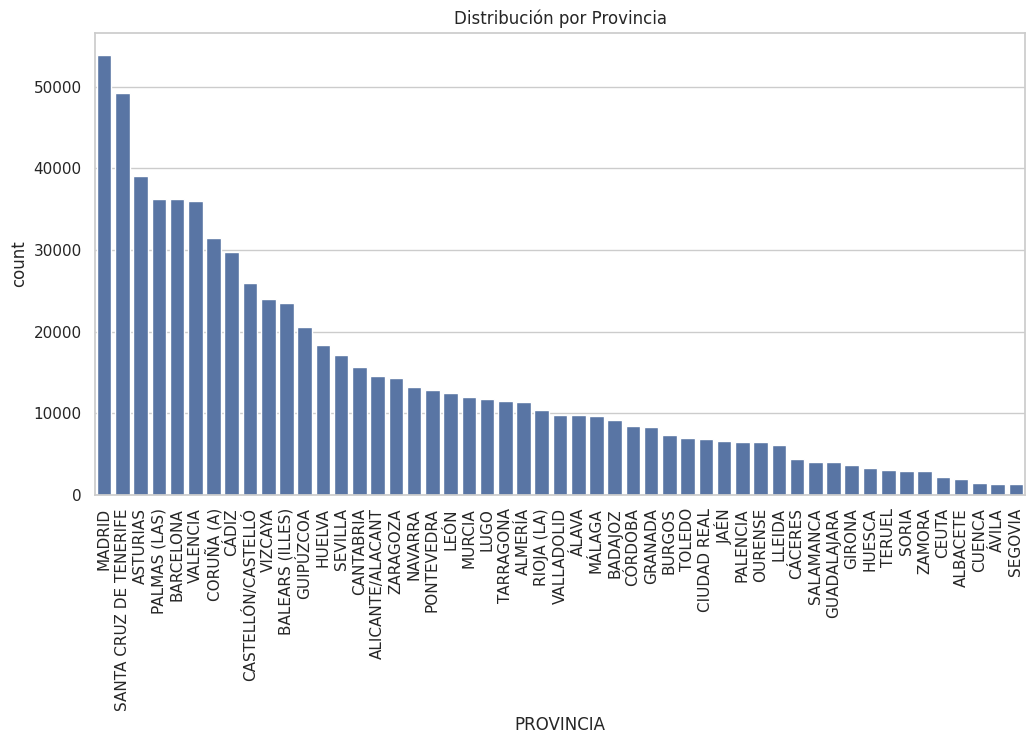

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Suponiendo que clean_df es tu DataFrame y tiene una columna 'PROVINCIA'
sns.countplot(data=clean_df, x='PROVINCIA', order = clean_df['PROVINCIA'].value_counts().index)

plt.title('Distribución por Provincia')
plt.xticks(rotation=90)
plt.show()


In [24]:
# Lista de columnas de las cuales quieres calcular la media
columnas_h = [col for col in clean_df.columns if col.startswith('H')]

# Calcular la media de esas columnas para cada fila
clean_df['Media_Horaria'] = clean_df[columnas_h].mean(axis=1)
clean_df

FECHA      N_CCAA PROVINCIA      N_MUNICIPIO  ESTACION MAGNITUD  \
0       2022-01-04  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
1       2022-01-05  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
2       2022-01-06  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
3       2022-01-07  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
4       2022-01-08  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
...            ...         ...       ...              ...       ...      ...   
719277  2022-12-13       CEUTA     CEUTA            CEUTA         1      SO2   
719278  2022-12-16       CEUTA     CEUTA            CEUTA         1      SO2   
719279  2022-12-25       CEUTA     CEUTA            CEUTA         1      SO2   
719280  2022-12-26       CEUTA     CEUTA            CEUTA         1      SO2   
719281  2022-12-28       CEUTA     CEUTA            CEUTA         1      SO2   

        LATITUD  LONGITUD   H01   H02  ...    H16    H17    H18    H19    H20  \
0       42.8548   -2.6807  0.16  0.16  ...   0.18   0.19   0.25   0.25   0.28   
1       42.8548   -2.6807  0.23  0.26  ...   0.33   0.45   0.58   0.57   0.51   
2       42.8548   -2.6807  0.36  0.31  ...   0.26   0.29   0.36   0.43   0.32   
3       42.8548   -2.6807  0.25  0.24  ...   0.29   0.28   0.32   0.31   0.23   
4       42.8548   -2.6807  0.25  0.25  ...   0.20   0.23   0.25   0.25   0.23   
...         ...       ...   ...   ...  ...    ...    ...    ...    ...    ...   
719277  35.8930   -5.3147  1.53  1.33  ...   2.43   3.32   6.62  19.11  17.15   
719278  35.8930   -5.3147  1.64  1.50  ...  25.54  12.58  38.78  17.84   8.01   
719279  35.8930   -5.3147  2.30  2.15  ...   2.27   2.07   2.00   1.79   1.65   
719280  35.8930   -5.3147  1.40  1.22  ...   3.77   2.82   2.47   2.79   2.77   
719281  35.8930   -5.3147  1.68  1.40  ...   1.71   1.66   1.70   1.58   2.12   

          H21    H22    H23    H24  Media_Horaria  
0        0.25   0.20   0.20   0.22       0.187083  
1        0.51   0.51   0.48   0.41       0.363333  
2        0.32   0.30   0.30   0.28       0.337083  
3        0.25   0.29   0.29   0.28       0.281667  
4        0.20   0.22   0.22   0.19       0.266250  
...       ...    ...    ...    ...            ...  
719277   8.29  29.35  24.51  24.16       6.664167  
719278  11.66   3.28   5.70   5.62       7.757083  
719279   1.68   1.39   1.30   1.28       2.195833  
719280   2.66   2.51   2.42   2.52       2.034167  
719281   1.61   1.57   1.88   1.62       1.816250  

[719282 rows x 33 columns]

In [26]:
# Función para clasificar los valores de peligrosidad de cada contaminante
def clasificar_peligrosidad(valor, umbrales):
    if valor < umbrales['bajo']:
        return 'baja'
    elif valor < umbrales['alto']:
        return 'media'
    else:
        return 'alta'

# Aplicar la función a cada fila del DataFrame
def clasificar_fila(row):
    contaminante = row['MAGNITUD']
    valor = row['Media_Horaria']
    if contaminante in umbrales_peligrosidad:
        return clasificar_peligrosidad(valor, umbrales_peligrosidad[contaminante])

# Supongamos que estos son tus umbrales de peligrosidad definidos para 8 contaminantes
umbrales_peligrosidad = {
    'SO2': {'bajo': 20, 'alto': 50},
    'CO': {'bajo': 5, 'alto': 15},
    'NO': {'bajo': 30, 'alto': 60},
    'NO2': {'bajo': 40, 'alto': 80},
    'PM2.5': {'bajo': 12, 'alto': 35},
    'PM10': {'bajo': 20, 'alto': 50}, 
    'NOX': {'bajo': 50, 'alto': 100},
    'O3': {'bajo': 30, 'alto': 70}
}

# Crear una nueva columna con la clasificación de peligrosidad
clean_df['Peligrosidad'] = clean_df.apply(clasificar_fila, axis=1)

clean_df

FECHA      N_CCAA PROVINCIA      N_MUNICIPIO  ESTACION MAGNITUD  \
0       2022-01-04  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
1       2022-01-05  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
2       2022-01-06  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
3       2022-01-07  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
4       2022-01-08  PAÍS VASCO     ÁLAVA  VITORIA-GASTEIZ         8     C6H6   
...            ...         ...       ...              ...       ...      ...   
719277  2022-12-13       CEUTA     CEUTA            CEUTA         1      SO2   
719278  2022-12-16       CEUTA     CEUTA            CEUTA         1      SO2   
719279  2022-12-25       CEUTA     CEUTA            CEUTA         1      SO2   
719280  2022-12-26       CEUTA     CEUTA            CEUTA         1      SO2   
719281  2022-12-28       CEUTA     CEUTA            CEUTA         1      SO2   

        LATITUD  LONGITUD   H01   H02  ...    H17    H18    H19    H20    H21  \
0       42.8548   -2.6807  0.16  0.16  ...   0.19   0.25   0.25   0.28   0.25   
1       42.8548   -2.6807  0.23  0.26  ...   0.45   0.58   0.57   0.51   0.51   
2       42.8548   -2.6807  0.36  0.31  ...   0.29   0.36   0.43   0.32   0.32   
3       42.8548   -2.6807  0.25  0.24  ...   0.28   0.32   0.31   0.23   0.25   
4       42.8548   -2.6807  0.25  0.25  ...   0.23   0.25   0.25   0.23   0.20   
...         ...       ...   ...   ...  ...    ...    ...    ...    ...    ...   
719277  35.8930   -5.3147  1.53  1.33  ...   3.32   6.62  19.11  17.15   8.29   
719278  35.8930   -5.3147  1.64  1.50  ...  12.58  38.78  17.84   8.01  11.66   
719279  35.8930   -5.3147  2.30  2.15  ...   2.07   2.00   1.79   1.65   1.68   
719280  35.8930   -5.3147  1.40  1.22  ...   2.82   2.47   2.79   2.77   2.66   
719281  35.8930   -5.3147  1.68  1.40  ...   1.66   1.70   1.58   2.12   1.61   

          H22    H23    H24  Media_Horaria  Peligrosidad  
0        0.20   0.20   0.22       0.187083          None  
1        0.51   0.48   0.41       0.363333          None  
2        0.30   0.30   0.28       0.337083          None  
3        0.29   0.29   0.28       0.281667          None  
4        0.22   0.22   0.19       0.266250          None  
...       ...    ...    ...            ...           ...  
719277  29.35  24.51  24.16       6.664167          baja  
719278   3.28   5.70   5.62       7.757083          baja  
719279   1.39   1.30   1.28       2.195833          baja  
719280   2.51   2.42   2.52       2.034167          baja  
719281   1.57   1.88   1.62       1.816250          baja  

[719282 rows x 34 columns]